In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import express as px
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

### Generating Dataset

In [2]:
X_generated, y_generated = make_circles(n_samples = 1000, random_state = 10)

In [3]:
X_generated.shape, y_generated.shape

((1000, 2), (1000,))

### Visualising the dataset

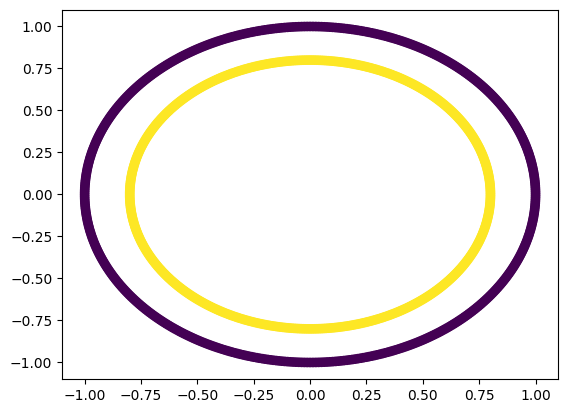

In [4]:
plt.scatter(X_generated[:, 0], X_generated[:, 1], c = y_generated)
plt.show()

In [5]:
dataset = pd.DataFrame(np.hstack([X_generated, np.expand_dims(y_generated, axis = 1)]), columns = ['x1', 'x2', 'y'])

In [6]:
dataset['y'] = dataset['y'].astype('int')

In [7]:
dataset.head()

,x1,x2,y
0,-0.331500,-0.728085,1
1,0.680796,-0.420140,1
2,0.680796,0.420140,1
3,-0.567269,0.823533,0
4,-0.794889,-0.090285,1


### Polynomial Kernel
- $ K(x_1, x_2) = (x_1^Tx_2+c)^d $

In [8]:
dataset['x1_square'] = dataset['x1']**2
dataset['x2_square'] = dataset['x2']**2
dataset['x1_x2'] = dataset['x1'] * dataset['x2']

In [9]:
dataset.head()

,x1,x2,y,x1_square,x2_square,x1_x2
0,-0.331500,-0.728085,1,0.109893,0.530107,0.241360
1,0.680796,-0.420140,1,0.463483,0.176517,-0.286029
2,0.680796,0.420140,1,0.463483,0.176517,0.286029
3,-0.567269,0.823533,0,0.321794,0.678206,-0.467164
4,-0.794889,-0.090285,1,0.631849,0.008151,0.071767


### Dividing our dataset into dependent and independent features

In [10]:
X = dataset[['x1_square', 'x2_square', 'x1_x2']] ## Independent features
y = dataset['y'] ## Dependent feature

In [11]:
X.head()

,x1_square,x2_square,x1_x2
0,0.109893,0.530107,0.241360
1,0.463483,0.176517,-0.286029
2,0.463483,0.176517,0.286029
3,0.321794,0.678206,-0.467164
4,0.631849,0.008151,0.071767


In [12]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: y, dtype: int32

### Splitting the dataset in train and test datasets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)

In [14]:
fig = px.scatter_3d(data_frame = dataset, x = 'x1_square', y = 'x2_square', z = 'x1_x2', color = 'y')
fig.show()

### Classfiying the above using linear SVM by applying polynomial kernel manually

In [15]:
svc = SVC(kernel = 'linear')

In [16]:
X_train.head()

,x1_square,x2_square,x1_x2
128,0.463483,0.176517,-0.286029
492,0.000909,0.639091,-0.024105
303,0.103005,0.896995,0.303965
120,0.081299,0.558701,-0.213124
455,0.872971,0.127029,0.333006


In [17]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

### Prediction

In [18]:
y_pred_test = svc.predict(X_test)

### Confusion Matrix, Accuraccy Score, Classification Report

In [19]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[141   0]
 [  0 159]]


In [20]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))

Accuracy Score:  1.0


In [21]:
print("------------------Classification Report------------------\n", classification_report(y_test, y_pred_test))

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       159

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### Radial Basis Kernel Function
- $ K(x_1, x_2) = \exp(-\frac{{\lVert x_1 - x_2 \rVert}^2}{2\sigma^2}) $
- $ \lVert x_1 - x_2 \rVert : $ Squared Euclidean Distance
- $ \gamma : \frac{1}{2\sigma^2} $

### Dividing our dataset into dependent and independent features

In [22]:
X = dataset[['x1', 'x2']] ## Independent features
y = dataset['y'] ## Dependent feature

In [23]:
X.head()

,x1,x2
0,-0.331500,-0.728085
1,0.680796,-0.420140
2,0.680796,0.420140
3,-0.567269,0.823533
4,-0.794889,-0.090285


In [24]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: y, dtype: int32

### Splitting the dataset in train and test datasets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)

### Classfiying the above using rbf kernel

In [26]:
svc = SVC(kernel = 'rbf')

In [27]:
svc.fit(X_train, y_train)

SVC()

### Prediction

In [28]:
y_pred_test = svc.predict(X_test)

### Confusion Matrix, Accuraccy Score, Classification Report

In [29]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[141   0]
 [  0 159]]


In [30]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))

Accuracy Score:  1.0


In [31]:
print("------------------Classification Report------------------\n", classification_report(y_test, y_pred_test))

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       159

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### Sigmoid Kernel
- $ S(x) = \frac{1}{1 + e^{-x}} = \frac{e^x}{e^x + 1} $

### Classfiying the above using sigmoid kernel

In [36]:
svc = SVC(kernel = 'sigmoid')

In [37]:
svc.fit(X_train, y_train)

SVC(kernel='sigmoid')

### Prediction

In [38]:
y_pred_test = svc.predict(X_test)

### Confusion Matrix, Accuraccy Score, Classification Report

In [39]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
 [[80 61]
 [84 75]]


In [40]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))

Accuracy Score:  0.5166666666666667


In [41]:
print("------------------Classification Report------------------\n", classification_report(y_test, y_pred_test))

------------------Classification Report------------------
               precision    recall  f1-score   support

           0       0.49      0.57      0.52       141
           1       0.55      0.47      0.51       159

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

